In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [180]:
heart_health=pd.read_csv('heart.csv')
heart_health.head()

,age,sex,chest pain,resting bp,cholestrol,fasting blood sugar (1 if >120),RestECG,Max Heart beat,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [181]:
print('# of patients considered for observation:'+str(len(heart_health.index)))

# of patients considered for observation:303


## Analyzing Data

<AxesSubplot:xlabel='output', ylabel='count'>

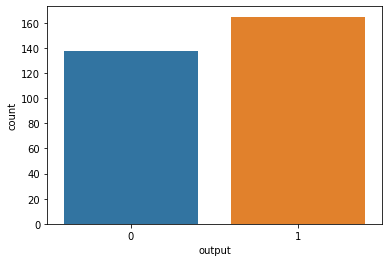

In [182]:
sns.countplot(x="output",data=heart_health)

In [183]:
# Around 138 people have less chance of having heart attack and around 165 people are having more chances of having an heart attack

<AxesSubplot:xlabel='output', ylabel='count'>

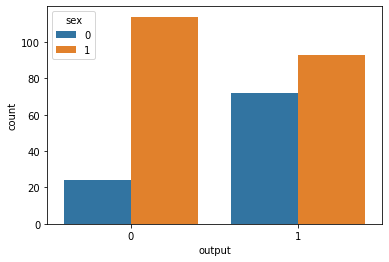

In [184]:
sns.countplot(x="output",hue='sex', data=heart_health)

<AxesSubplot:xlabel='output', ylabel='count'>

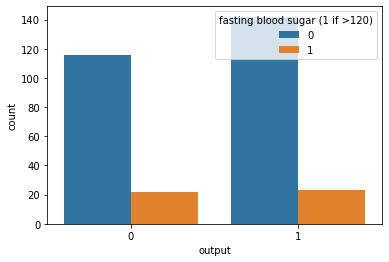

In [185]:
sns.countplot(x="output",hue='fasting blood sugar (1 if >120)', data=heart_health)

<AxesSubplot:xlabel='output', ylabel='count'>

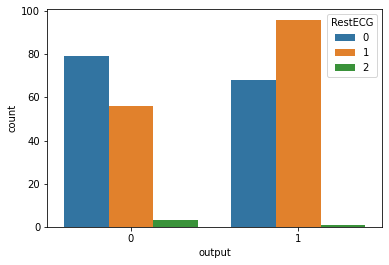

In [186]:
sns.countplot(x="output",hue='RestECG', data=heart_health)

<AxesSubplot:xlabel='output', ylabel='count'>

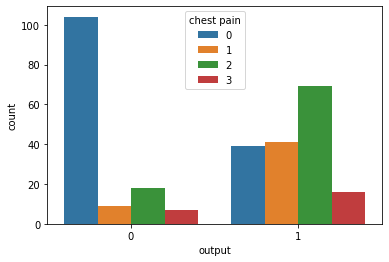

In [187]:
sns.countplot(x="output",hue='chest pain', data=heart_health)

<AxesSubplot:xlabel='output', ylabel='count'>

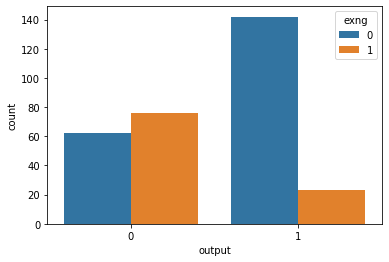

In [188]:
sns.countplot(x="output",hue='exng', data=heart_health)

<AxesSubplot:ylabel='Frequency'>

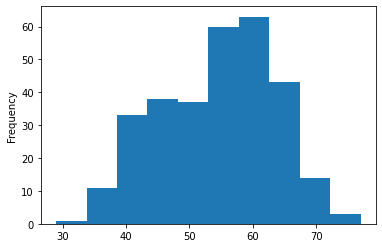

In [189]:
heart_health['age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

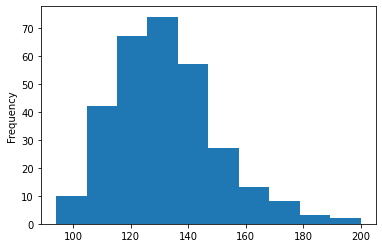

In [190]:
heart_health['resting bp'].plot.hist()

In [191]:
heart_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              303 non-null    int64  
 1   sex                              303 non-null    int64  
 2   chest pain                       303 non-null    int64  
 3   resting bp                       303 non-null    int64  
 4   cholestrol                       303 non-null    int64  
 5   fasting blood sugar (1 if >120)  303 non-null    int64  
 6   RestECG                          303 non-null    int64  
 7   Max Heart beat                   303 non-null    int64  
 8   exng                             303 non-null    int64  
 9   oldpeak                          303 non-null    float64
 10  slp                              303 non-null    int64  
 11  caa                              303 non-null    int64  
 12  thall                 

## Data Wrangling

In [192]:
heart_health.isnull().sum()

age                                0
sex                                0
chest pain                         0
resting bp                         0
cholestrol                         0
fasting blood sugar (1 if >120)    0
RestECG                            0
Max Heart beat                     0
exng                               0
oldpeak                            0
slp                                0
caa                                0
thall                              0
output                             0
dtype: int64

<AxesSubplot:xlabel='chest pain', ylabel='age'>

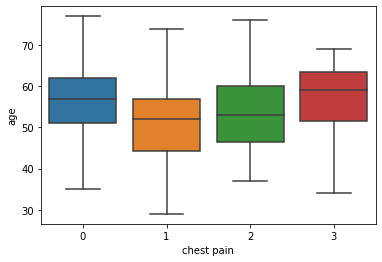

In [193]:
sns.boxplot(x='chest pain', y='age',data=heart_health)

<AxesSubplot:xlabel='RestECG', ylabel='age'>

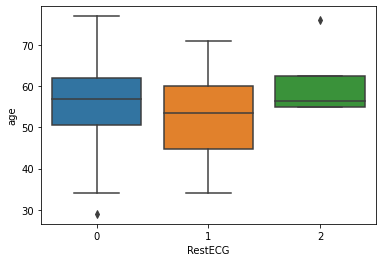

In [194]:
sns.boxplot(x='RestECG', y='age',data=heart_health)

In [195]:
heart_health.head(5)

,age,sex,chest pain,resting bp,cholestrol,fasting blood sugar (1 if >120),RestECG,Max Heart beat,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [196]:
heart_health['chest pain']=heart_health['chest pain'].replace({0: 'cp0', 1:'cp1',2: 'cp2', 3: 'cp3'})
heart_health.head()


,age,sex,chest pain,resting bp,cholestrol,fasting blood sugar (1 if >120),RestECG,Max Heart beat,exng,oldpeak,slp,caa,thall,output
0,63,1,cp3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,cp2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,cp1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,cp1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,cp0,120,354,0,1,163,1,0.6,2,0,2,1


In [197]:
heart_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              303 non-null    int64  
 1   sex                              303 non-null    int64  
 2   chest pain                       303 non-null    object 
 3   resting bp                       303 non-null    int64  
 4   cholestrol                       303 non-null    int64  
 5   fasting blood sugar (1 if >120)  303 non-null    int64  
 6   RestECG                          303 non-null    int64  
 7   Max Heart beat                   303 non-null    int64  
 8   exng                             303 non-null    int64  
 9   oldpeak                          303 non-null    float64
 10  slp                              303 non-null    int64  
 11  caa                              303 non-null    int64  
 12  thall                 

In [198]:
heart_health=pd.get_dummies(heart_health, columns=['chest pain'])
heart_health.head()

,age,sex,resting bp,cholestrol,fasting blood sugar (1 if >120),RestECG,Max Heart beat,exng,oldpeak,slp,caa,thall,output,chest pain_cp0,chest pain_cp1,chest pain_cp2,chest pain_cp3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0


In [199]:
heart_health['sex']=heart_health['sex'].replace({0: 'male', 1:'female'})
heart_health=pd.get_dummies(heart_health, columns=['sex'])

In [200]:
heart_health['fasting blood sugar (1 if >120)']=heart_health['fasting blood sugar (1 if >120)'].replace({0: 'good', 1:'bad'})
heart_health=pd.get_dummies(heart_health, columns=['fasting blood sugar (1 if >120)'])

In [201]:
heart_health['RestECG']=heart_health['RestECG'].replace({0: 'good', 1:'bad', 2: 'very bad'})
heart_health=pd.get_dummies(heart_health, columns=['RestECG'])

In [202]:
heart_health['exng']=heart_health['exng'].replace({0: 'normal', 1:'not normal'})
heart_health=pd.get_dummies(heart_health, columns=['exng'])

In [203]:
heart_health['slp']=heart_health['slp'].replace({0: 'good', 1:'bad', 2: 'very bad'})
heart_health=pd.get_dummies(heart_health, columns=['slp'])

In [204]:
heart_health['thall']=heart_health['thall'].replace({0: 'good', 1:'bad', 2: 'very bad'})
heart_health=pd.get_dummies(heart_health, columns=['thall'])

In [205]:
heart_health['caa']=heart_health['caa'].replace({0: 'vey bad', 1:'bad', 2: 'moderate', 3:'good', 4:'very good'})
heart_health=pd.get_dummies(heart_health, columns=['caa'])

In [206]:
heart_health.head()

,age,resting bp,cholestrol,Max Heart beat,oldpeak,output,chest pain_cp0,chest pain_cp1,chest pain_cp2,chest pain_cp3,...,slp_very bad,thall_3,thall_bad,thall_good,thall_very bad,caa_bad,caa_good,caa_moderate,caa_very good,caa_vey bad
0,63,145,233,150,2.3,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,37,130,250,187,3.5,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,41,130,204,172,1.4,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
3,56,120,236,178,0.8,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
4,57,120,354,163,0.6,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [207]:
heart_health.columns

Index(['age', 'resting bp', 'cholestrol', 'Max Heart beat', 'oldpeak',
       'output', 'chest pain_cp0', 'chest pain_cp1', 'chest pain_cp2',
       'chest pain_cp3', 'sex_female', 'sex_male',
       'fasting blood sugar (1 if >120)_bad',
       'fasting blood sugar (1 if >120)_good', 'RestECG_bad', 'RestECG_good',
       'RestECG_very bad', 'exng_normal', 'exng_not normal', 'slp_bad',
       'slp_good', 'slp_very bad', 'thall_3', 'thall_bad', 'thall_good',
       'thall_very bad', 'caa_bad', 'caa_good', 'caa_moderate',
       'caa_very good', 'caa_vey bad'],
      dtype='object')

In [208]:
# X=heart_health.drop(['chest pain'], axis=1)

In [209]:
X.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

# Train Data

In [210]:
X=heart_health.drop('output',axis=1)
y=heart_health['output']

In [212]:
X=np.array(X)
X

array([[ 63., 145., 233., ...,   0.,   0.,   1.],
       [ 37., 130., 250., ...,   0.,   0.,   1.],
       [ 41., 130., 204., ...,   0.,   0.,   1.],
       ...,
       [ 68., 144., 193., ...,   1.,   0.,   0.],
       [ 57., 130., 131., ...,   0.,   0.,   0.],
       [ 57., 130., 236., ...,   0.,   0.,   0.]])

In [213]:
from sklearn.model_selection import train_test_split

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

## Scaling the data

In [215]:
from sklearn.preprocessing import StandardScaler

In [216]:
standrd = StandardScaler()
X_train = standrd.fit_transform(X_train)

In [217]:
X_test = standrd.transform(X_test)

In [218]:
from sklearn.linear_model import LogisticRegression

In [219]:
logmodel=LogisticRegression()

In [220]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [221]:
predictions=logmodel.predict(X_test)

In [222]:
from sklearn.metrics import classification_report

In [223]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.88      0.88      0.88        25\n           1       0.92      0.92      0.92        36\n\n    accuracy                           0.90        61\n   macro avg       0.90      0.90      0.90        61\nweighted avg       0.90      0.90      0.90        61\n'

In [224]:
from sklearn.metrics import confusion_matrix

In [225]:
confusion_matrix(y_test,predictions)

array([[22,  3],
       [ 3, 33]], dtype=int64)

In [226]:
from sklearn.metrics import accuracy_score

In [227]:
accuracy_score(y_test,predictions)

0.9016393442622951

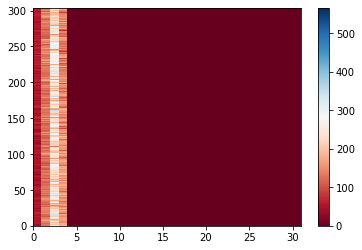

In [228]:
plt.pcolor(heart_health, cmap='RdBu')
plt.colorbar()
plt.show()